In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

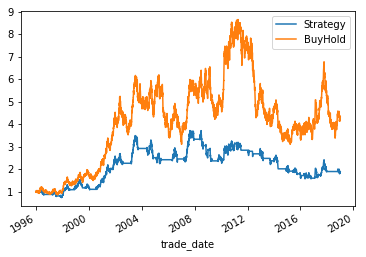

In [4]:
# Read in AMD.csv into a dataframe
data = pd.read_csv('AMD.csv', index_col='trade_date', parse_dates=['trade_date'])

# Calculate two moving averages
data['SMA50'] = data['close'].rolling(50).mean()
data['SMA100'] = data['close'].rolling(100).mean()

# Set to 1 if SMA50 is above SMA100 else set to 0
data['Position'] = np.where(data['SMA50'] > data['SMA100'], 1, 0)

# Buy a day delayed, shift the column
data['Position'] = data['Position'].shift()

# Calculate the daily percent returns of strategy
data['StrategyPct'] = data['close'].pct_change(1) * data['Position']

# Calculate cumulative returns
data['Strategy'] = (data['StrategyPct'] + 1).cumprod()

# Calculate index cumulative returns
data['BuyHold'] = (data['close'].pct_change(1) + 1).cumprod()

# Plot result
data[['Strategy', 'BuyHold']].plot()